In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('billet_authentication.csv')
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'billet_authentication.csv'

In [ ]:
len(df.columns)

5

In [ ]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

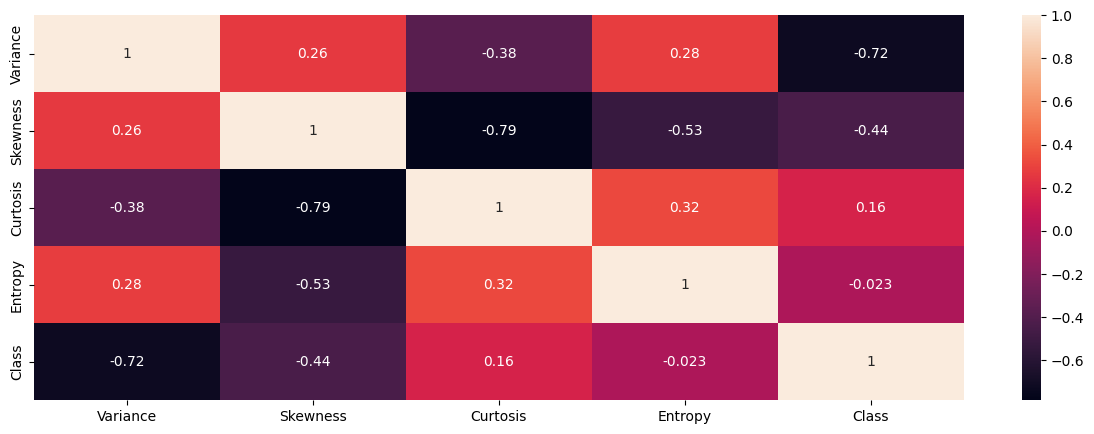

In [ ]:
plt.figure(figsize=(15,5))
sb.heatmap(df.corr(), annot=True)
plt.show()

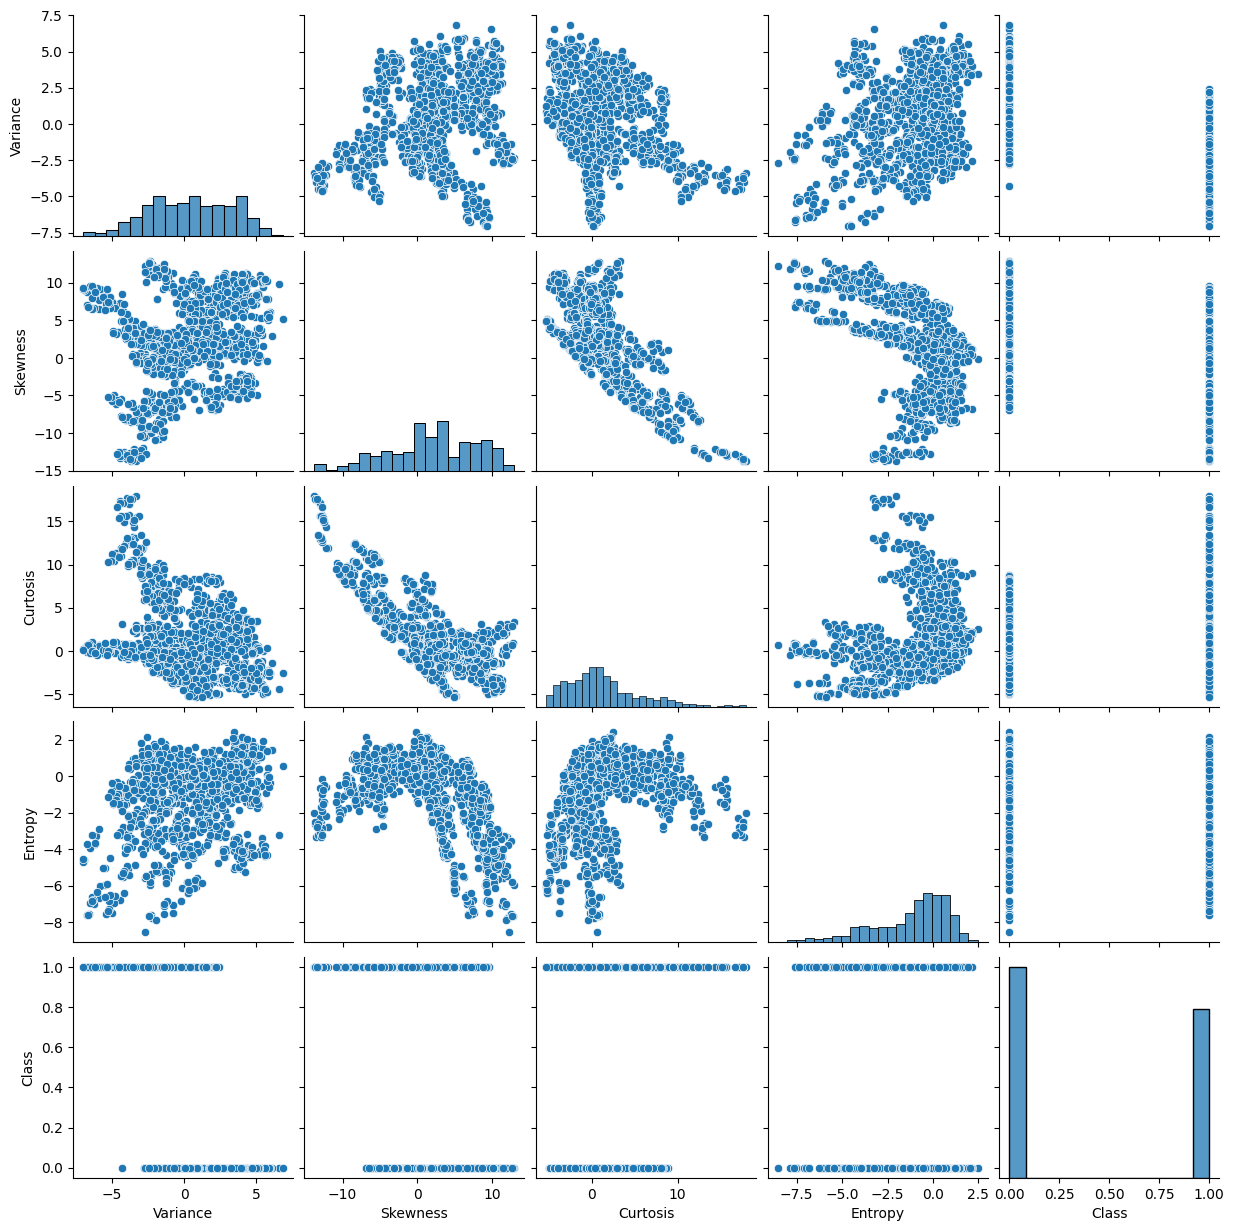

In [ ]:
sb.pairplot(data=df)

<AxesSubplot: xlabel='Variance'>

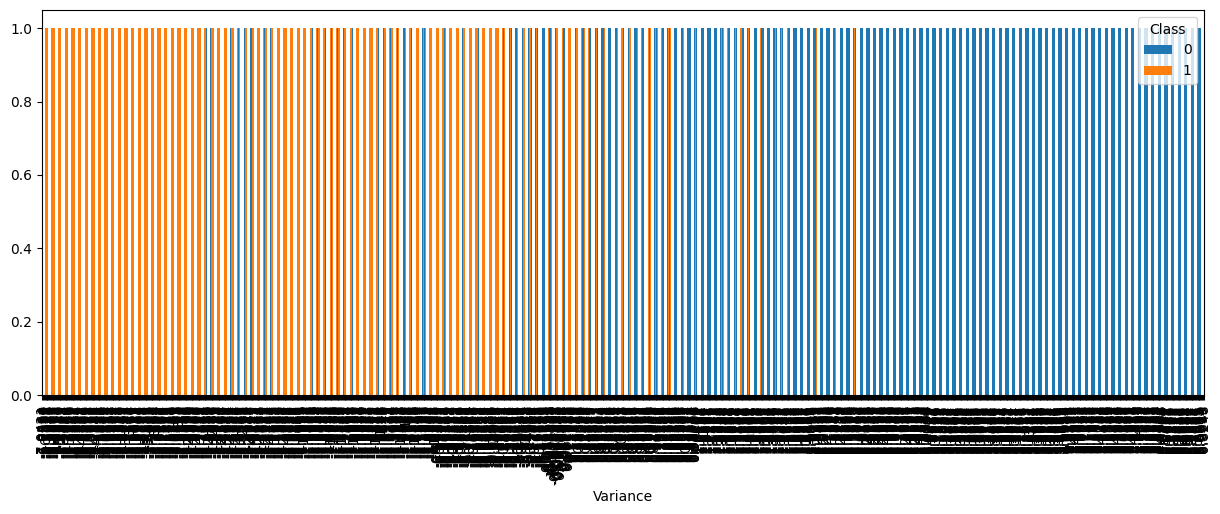

In [ ]:
table = pd.crosstab(df['Variance'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,5))

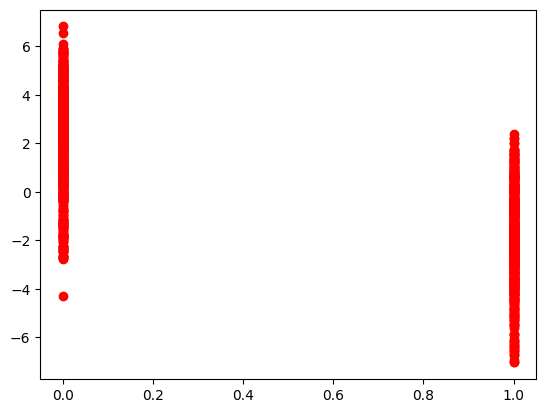

In [ ]:
plt.scatter(df['Class'], df['Variance'], color = 'red')
plt.show()

<AxesSubplot: xlabel='Class', ylabel='Variance'>

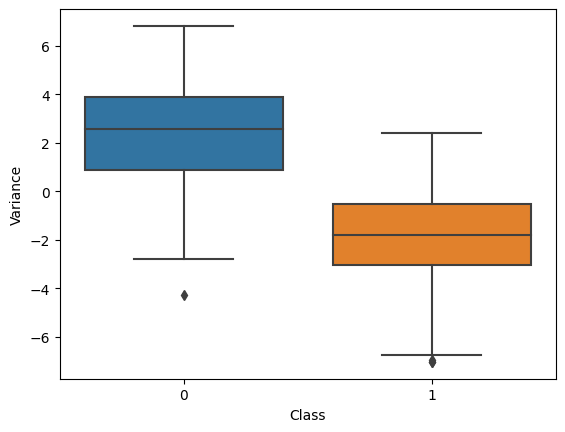

In [ ]:
sb.boxplot(data=df, x="Class", y="Variance")

<AxesSubplot: xlabel='Skewness'>

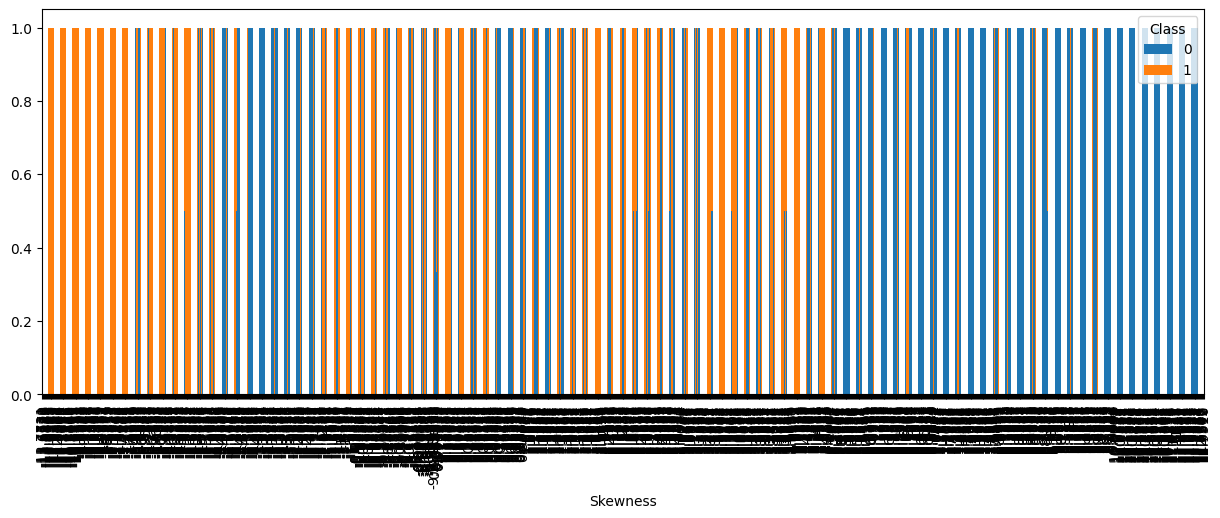

In [ ]:
table = pd.crosstab(df['Skewness'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,5))

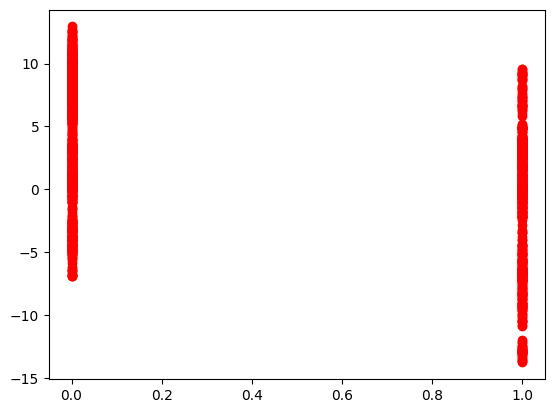

In [ ]:
plt.scatter(df['Class'], df['Skewness'], color = 'red')
plt.show()

<AxesSubplot: xlabel='Class', ylabel='Skewness'>

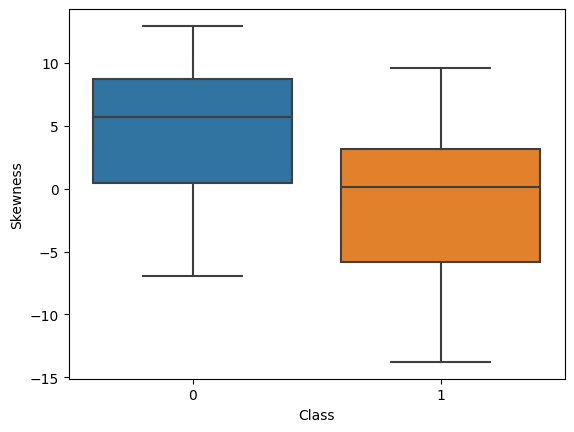

In [ ]:
sb.boxplot(data=df, x="Class", y="Skewness")

<AxesSubplot: xlabel='Curtosis'>

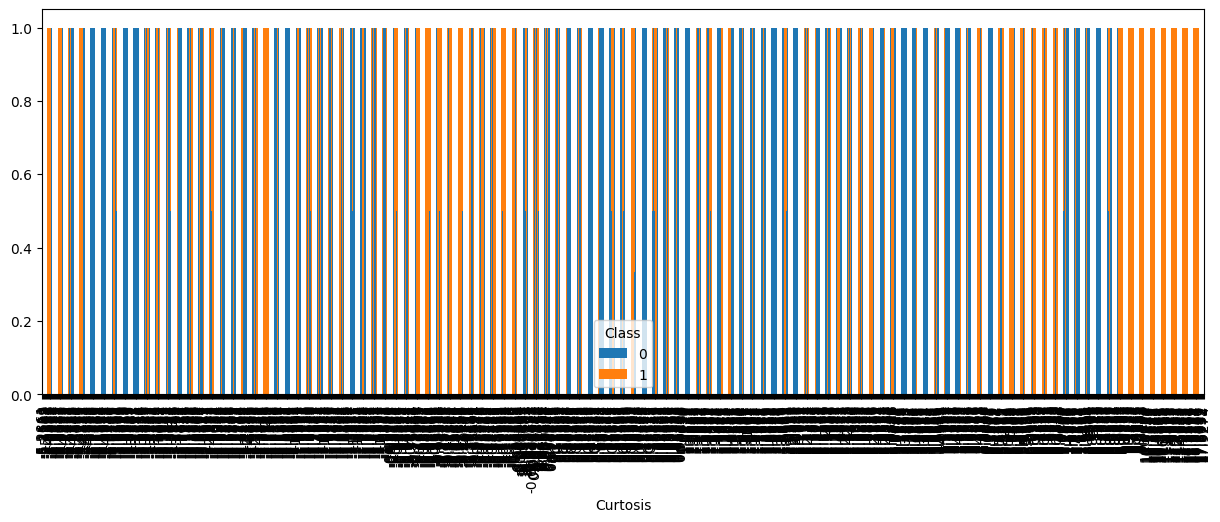

In [ ]:
table = pd.crosstab(df['Curtosis'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,5))

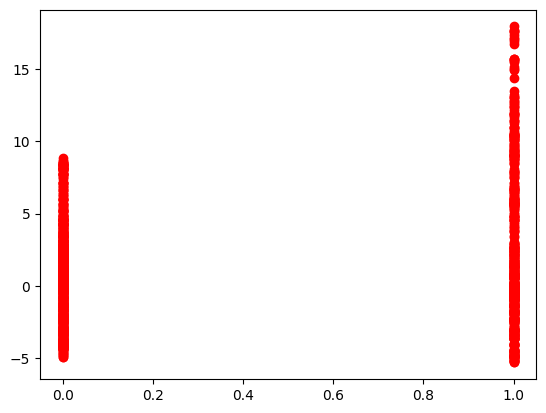

In [ ]:
plt.scatter(df['Class'], df['Curtosis'], color = 'red')
plt.show()

<AxesSubplot: xlabel='Class', ylabel='Curtosis'>

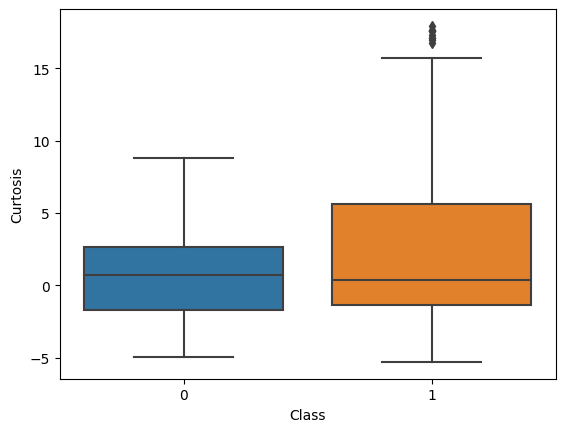

In [ ]:
sb.boxplot(data=df, x="Class", y="Curtosis")

<AxesSubplot: xlabel='Entropy'>

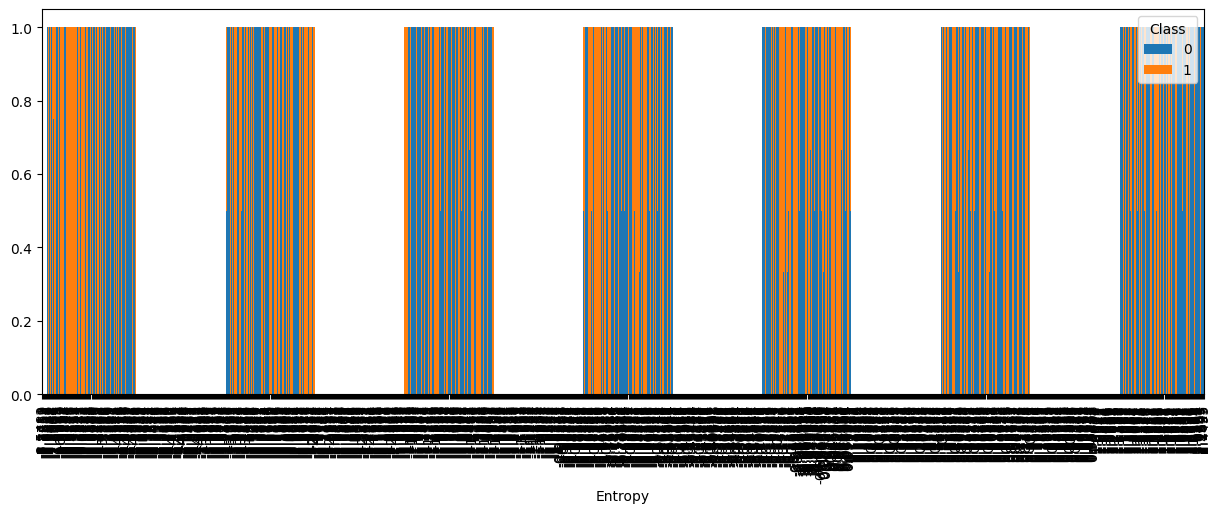

In [ ]:
table = pd.crosstab(df['Entropy'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,5))

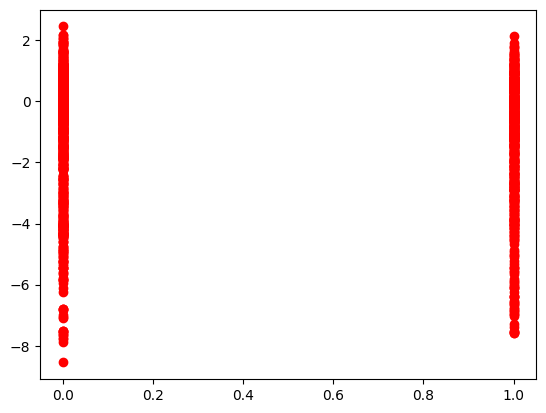

In [ ]:
plt.scatter(df['Class'], df['Entropy'], color = 'red')
plt.show()

<AxesSubplot: xlabel='Class', ylabel='Entropy'>

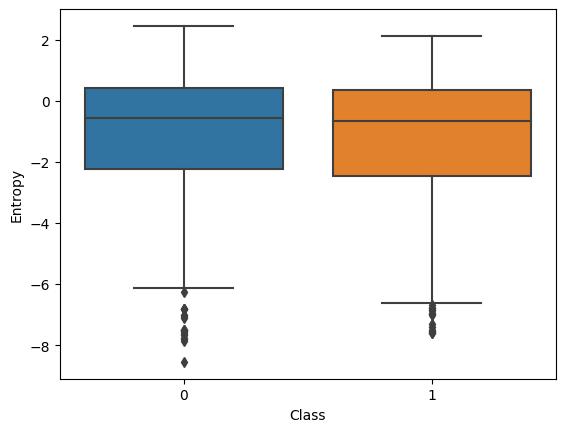

In [ ]:
sb.boxplot(data=df, x="Class", y="Entropy")

In [ ]:
df_y = df.iloc[:, -1]

In [ ]:
df_x = df.iloc[:, :-1]

In [ ]:
df_x.drop('Entropy', axis=1, inplace=True)

In [ ]:
df_x

,Variance,Skewness,Curtosis
0,3.62160,8.66610,-2.8073
1,4.54590,8.16740,-2.4586
2,3.86600,-2.63830,1.9242
3,3.45660,9.52280,-4.0112
4,0.32924,-4.45520,4.5718
...,...,...,...
1367,0.40614,1.34920,-1.4501
1368,-1.38870,-4.87730,6.4774
1369,-3.75030,-13.45860,17.5932
1370,-3.56370,-8.38270,12.3930


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

In [ ]:
sc = StandardScaler()
x_train_standard = sc.fit_transform(x_train)
x_test_standard = sc.transform(x_test)

In [ ]:
svc_model = SVC(random_state=0)
svc_model.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = svc_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[150,   1],
       [  0, 124]], dtype=int64)

<AxesSubplot: >

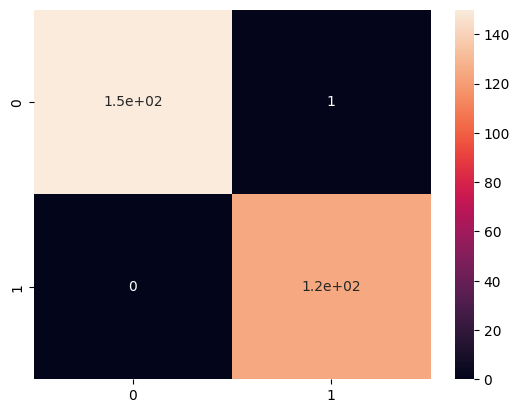

In [ ]:
sb.heatmap(cm, annot=True)

In [ ]:
accuracy_score(y_test, y_pred)

0.9963636363636363

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       1.00      0.99      1.00       125

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

